### 数字图像处理第六章


Problems

Take a color picture, program for it to get following results,

(1) Its Red, Green and Blue image respectively;


(2) Its Hue, Saturation and Intensity image respectively;


(3) Do pseudo-color image processing(assign different colors for different gray levels);


(4) Detect all edges in the color picture.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/drive/My Drive/数字图像处理/Image/Lenna.jpg')
img = img[:, :, [2, 1, 0]]

(316, 316, 3)


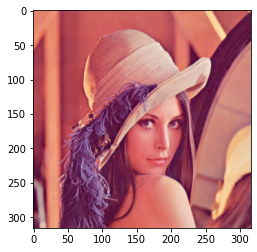

In [ ]:
print(img.shape)
plt.imshow(img)

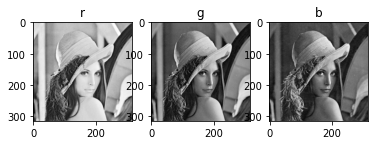

In [ ]:
plt.subplot(1,3,1)
plt.title('r')
plt.imshow(img[:, :, 0], cmap='gray')

plt.subplot(1,3,2)
plt.title('g')
plt.imshow(img[:, :, 1], cmap='gray')

plt.subplot(1,3,3)
plt.title('b')
plt.imshow(img[:, :, 2], cmap='gray')

### RGB->HSI
$$
H = \begin{cases}
\theta& B\leq G\\
360-\theta & B > G
\end{cases}
$$

$$\theta = arccos\{\frac{\frac{1}{2}[(R-G)+(R-B)]}{[(R-G)^2 + (R-B)(G-B)]^{1/2}}\}$$

$$S = 1 - \frac{3}{(R+G+B)}[min(R, G, B)]$$


$$I = \frac{1}{3}(R+G+B)$$

In [ ]:
def hsi_transform(imgs):
  h, w, c = imgs.shape
  H = np.zeros(shape=(h, w))
  S = np.zeros(shape=(h, w))
  I = np.zeros(shape=(h, w))
  for i in range(h):
    for j in range(w):
      r, g, b = imgs[i, j, :]
      r, g, b = r/255, g/255, b /255
      theta = np.arccos((2 * r - g - b ) *0.5 / np.sqrt((r - g) * (r-g) + (r-b)*(g-b)))
      if b > g:
        theta = 2*np.pi - theta
      S[i, j] = 1 - 3 / (r + g + b) * min(min(r, g), b)
      H[i, j] = theta
      I[i, j] = (r + g + b) / 3
  return H, S, I

In [ ]:
H, S, I = hsi_transform(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in arccos
  # Remove the CWD from sys.path while we load stuff.


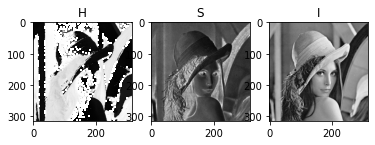

In [ ]:
plt.subplot(1,3,1)
plt.title('H')
plt.imshow(H, cmap='gray')

plt.subplot(1,3,2)
plt.title('S')
plt.imshow(S, cmap='gray')

plt.subplot(1,3,3)
plt.title('I')
plt.imshow(I, cmap='gray')

### 伪彩色处理

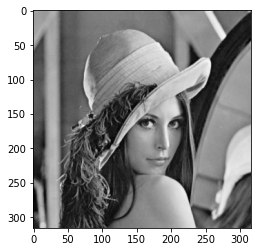

In [ ]:
img_gray = cv2.imread('/content/drive/My Drive/数字图像处理/Image/Lenna.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='gray')

In [ ]:
img_color = cv2.applyColorMap(img_gray, cv2.COLORMAP_JET)

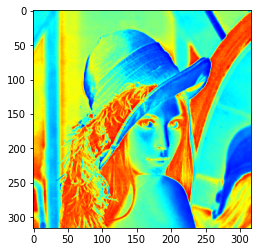

In [ ]:
plt.imshow(img_color)

### 彩色图像边缘检测

In [ ]:
def conv2d(img, filters):
  h, w = img.shape
  fh, fw = filters.shape

  # padding
  padding_h = int((fh - 1) / 2)
  padding_w = int((fw - 1) / 2)
  new_img = np.zeros(shape=(h + 2 * padding_h, w + 2 * padding_w))
  new_img[padding_h:h+padding_h, padding_w: w + padding_w] = img

  # conv2d
  out = np.zeros(shape=img.shape)

  for i in range(h):
    for j in range(w):
      out[i, j] = np.sum(new_img[i: i + fh, j : j + fw] * filters)
  
  return out

In [ ]:
def laplacian_filter(img, filters=np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])):
  out = conv2d(img, filters)
  out = np.array(out, dtype='uint8')
  return out

In [ ]:
out = np.zeros(shape=img.shape, dtype='uint8')
out[:, :, 0] = laplacian_filter(img[:, :, 0])
out[:, :, 1] = laplacian_filter(img[:, :, 1])
out[:, :, 2] = laplacian_filter(img[:, :, 2])

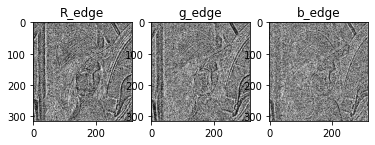

In [ ]:
plt.subplot(1,3,1)
plt.title('R_edge')
plt.imshow(out[:, :, 0], cmap='gray')

plt.subplot(1,3,2)
plt.title('g_edge')
plt.imshow(out[:, :, 1], cmap='gray')

plt.subplot(1,3,3)
plt.title('b_edge')
plt.imshow(out[:, :, 2], cmap='gray')